<a href="https://colab.research.google.com/github/TanyaKumari0204/Machine-Learning/blob/main/Cross_Validation%2CConfusion_Matrix%2CPrecision%2CF1%2CReall%2CGridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Data Collection  and preprocessing:-


In [92]:
heart_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

In [93]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
heart_data.shape

(303, 14)

In [95]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [96]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [97]:
heart_data['target'].value_counts()

,count
target,
1,165
0,138


1->Defective Heart
0->Healthy Heart


In [98]:
X=heart_data.drop(columns='target',axis=1)
Y=heart_data['target']

In [99]:
print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

#**Train test split**

In [100]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

In [101]:
X_train.shape,X_test.shape,X.shape

((242, 13), (61, 13), (303, 13))

Comparing the performance of model

In [133]:
#list of models
models=[LogisticRegression(max_iter=10000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(random_state=0)]

In [103]:
def compare_model_train_test():
  for model in models:
    model.fit(X_train,Y_train)
    test_data_prediction=model.predict(X_test)
    accuracy=accuracy_score(Y_test,test_data_prediction)
    print('Accuracy score of the',model,'=',accuracy)

In [104]:
compare_model_train_test()

Accuracy score of the LogisticRegression(max_iter=1000) = 0.7868852459016393
Accuracy score of the SVC(kernel='linear') = 0.7704918032786885
Accuracy score of the KNeighborsClassifier() = 0.6557377049180327
Accuracy score of the RandomForestClassifier() = 0.7868852459016393


kfold :-split data in test n train.cross_val score do this +evaluation

#**Cross Validation**

more relaible than train test split

In [105]:
cv_score_lr=cross_val_score(LogisticRegression(max_iter=1000),X,Y,cv=5)#cv=folds 5(subset (split in 5))
mean_accuracy_lr=sum(cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr=mean_accuracy_lr*100
mean_accuracy_lr=round(mean_accuracy_lr,2)



In [106]:
print(cv_score_lr)
print(mean_accuracy_lr)

[0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
82.83


Cross val is better than train test as it works on multiplechunks of dta (splited ones)

SVM

In [107]:
cv_score_svc=cross_val_score(SVC(kernel='linear'),X,Y,cv=5)#cv=folds 5(subset (split in 5))
mean_accuracy_svc=sum(cv_score_svc)/len(cv_score_svc)
mean_accuracy_svc=mean_accuracy_svc*100
mean_accuracy_svc=round(mean_accuracy_svc,2)

In [108]:
print(cv_score_svc)
print(mean_accuracy_svc)

[0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
82.83


Creating a function to compare the models


In [109]:
def compare_model_cross_val():
  for model in models:
    cv_score=cross_val_score(model,X,Y,cv=5)
    mean_accuracy=sum(cv_score)/len(cv_score)
    mean_accuracy=mean_accuracy*100
    mean_accuracy=round(mean_accuracy,2)
    print('Cross Validation accuracies for the',model ,'is',cv_score)
    print('Mean accuracy of the ',model, 'is' ,mean_accuracy,"%")
    print(".......................................")

In [71]:
compare_model_cross_val()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) is [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Mean accuracy of the  LogisticRegression(max_iter=1000) is 82.83 %
.......................................
Cross Validation accuracies for the SVC(kernel='linear') is [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Mean accuracy of the  SVC(kernel='linear') is 82.83 %
.......................................
Cross Validation accuracies for the KNeighborsClassifier() is [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Mean accuracy of the  KNeighborsClassifier() is 64.39 %
.......................................
Cross Validation accuracies for the RandomForestClassifier() is [0.85245902 0.91803279 0.78688525 0.83333333 0.76666667]
Mean accuracy of the  RandomForestClassifier() is 83.15 %
.......................................


Model Evaluation

In [72]:
model=LogisticRegression()

In [73]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
from sklearn.metrics import accuracy_score


In [75]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print(training_data_accuracy)

0.8636363636363636


In [76]:
print('Accuracy on training data:',round(training_data_accuracy*100,2),"%")

Accuracy on training data: 86.36 %


Accuracy on test_data

In [77]:
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print(testing_data_accuracy)


0.7868852459016393


In [78]:
print("Accuracy score of test data:",round(testing_data_accuracy*100,2),"%")

Accuracy score of test data: 78.69 %


Confusion Matrix

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
cf_matrix=confusion_matrix(Y_test,X_test_prediction)
print(cf_matrix)

[[20  8]
 [ 5 28]]


In [81]:
tn,fp,fn,tp=cf_matrix.ravel()
print(tn,fp,fn,tp)

20 8 5 28


<Axes: >

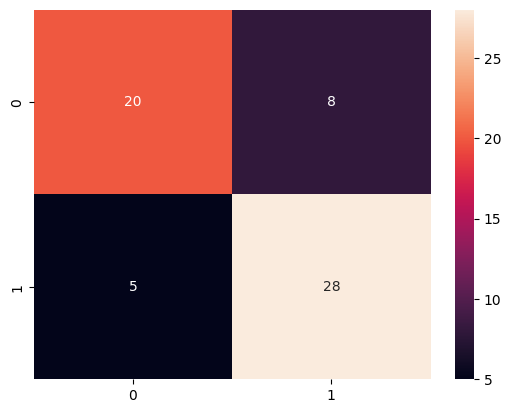

In [82]:
import seaborn as sns
sns.heatmap(cf_matrix,annot=True)

Precision:-tp/tp+Fp
recall:-tp/tp+fn
f1=2*(p*r)/(p+r)

In [83]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [84]:
#Precision for training data
precision=precision_score(Y_train,X_train_prediction)
print(precision)
print(round(precision*100),2,"%")

0.8413793103448276
84 2 %


In [85]:
#Precision of testing data
precision=precision_score(Y_test,X_test_prediction)
print(precision)
print(round(precision*100),2,"%")

0.7777777777777778
78 2 %


In [86]:
recall_train=recall_score(Y_train,X_train_prediction)
print(recall_train)
print(round(recall_train*100,2),"%")

0.9242424242424242
92.42 %


In [87]:
recall_test=recall_score(Y_test,X_test_prediction)
print(recall_test)
print(round(recall_test*100,2),"%")

0.8484848484848485
84.85 %


In [88]:
f1_train=f1_score(Y_train,X_train_prediction)
print(f1_train)
print(round(f1_train*100,2),"%")

0.8808664259927798
88.09 %


In [89]:
f1_test=f1_score(Y_test,X_test_prediction)
print(f1_test)
print(round(f1_test*100,2),"%")

0.8115942028985508
81.16 %


#**fun for all these**

In [110]:
def precision_recall_f1_score(true_labels,predicted_labels):
  precision=precision_score(true_labels,predicted_labels)
  recall=recall_score(true_labels,predicted_labels)
  f1=f1_score(true_labels,predicted_labels)
  return precision,recall,f1

In [111]:
precision_recall_f1_score(Y_test,X_test_prediction)

(0.7777777777777778, 0.8484848484848485, 0.8115942028985508)

#**Model Selection**

1. compare the models with default hyperparameters value using cross validation

In [112]:
#alrady done above

Randon forest  has best accuracy with default parameters in heart disease case


2. Comparing models with diff parameters Gridsearchcv

In [114]:
model_hyperparameters={
    'log_reg_hyperparameters':{
        'C': [1,5,10,20]
     },
    'svc_hyperparameters':{
        'kernel':['linear','poly','rbf','sigmoid'],
        'C':[1,5,10,20]
    },
    'KNN_hyperparameters':{
        'n_neighbors':[3,5,10]

    },
    'random_forest_hyperparameters':{
        'n_estimators':[10,20,50,100]#no of decision tree
    }
}


In [116]:
print(model_hyperparameters.keys())

dict_keys(['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters'])


In [118]:
print(model_hyperparameters.values())

dict_values([{'C': [1, 5, 10, 20]}, {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}, {'n_neighbors': [3, 5, 10]}, {'n_estimators': [10, 20, 50, 100]}])


In [119]:
model_keys=list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters']


In [120]:
model_hyperparameters['svc_hyperparameters']#value return

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}

In [121]:
model_keys[0]

'log_reg_hyperparameters'

In [124]:
model_hyperparameters[model_keys[0]]

{'C': [1, 5, 10, 20]}

Applying gridsearch

In [130]:
from sklearn.model_selection import GridSearchCV

def model_selection(list_of_models,hyperparameter_dict):
  result=[]
  i=0
  for model in list_of_models:
    keys=model_keys[i]
    params=hyperparameter_dict[keys]
    i+=1
    print(model)
    print(params)

    classifier=GridSearchCV(model,params,cv=5)
    classifier.fit(X,Y)
    result.append({
        'model used':model,
        'highest score':classifier.best_score_,
        'best hyperparameters':classifier.best_params_
    })
    return pd.DataFrame(result,columns=['model used','highest score','best hyperparameters'])



In [134]:
model_selection(models,model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=10000),0.831585,{'C': 5}
